<a href="https://colab.research.google.com/github/tejinder1988/PyProject/blob/main/UFO_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import plotly.express as px
from collections import Counter
import numpy as np

In [44]:
pd.set_option('display.max_rows', 500)

In [45]:
url = 'https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/3-Web-App/1-Web-App/data/ufos.csv'
df = pd.read_csv(url, index_col=0)

In [46]:
df['timestamp']=df.index

In [47]:
df=df.dropna()

In [48]:
df.country.value_counts()

us    63553
ca     2942
gb       11
au       10
Name: country, dtype: int64

In [49]:
df.index=range(len(df))

In [50]:
df["date"]=df["timestamp"].str[:-6]
df["date"]=pd.to_datetime(df["date"], format="%m/%d/%Y")
df["year"]=pd.DatetimeIndex(df['date']).year
df["month"]=pd.DatetimeIndex(df['date']).month

In [51]:
df = df[(df["year"]>1950) & (df["year"]<2014)]

In [52]:
len(df[["duration (seconds)"]])

64431

In [53]:
len(df[df["duration (seconds)"]>300])

21455

In [55]:
df=df[(df["duration (seconds)"]>300) & (df["duration (seconds)"]<3601)]

In [56]:
df_subset_bycountry = df[["year","country"]]
df_groupby_bycountry = df_subset_bycountry.groupby(["year","country"]).size()
#df_subset.groupby(["year","country"]).size()

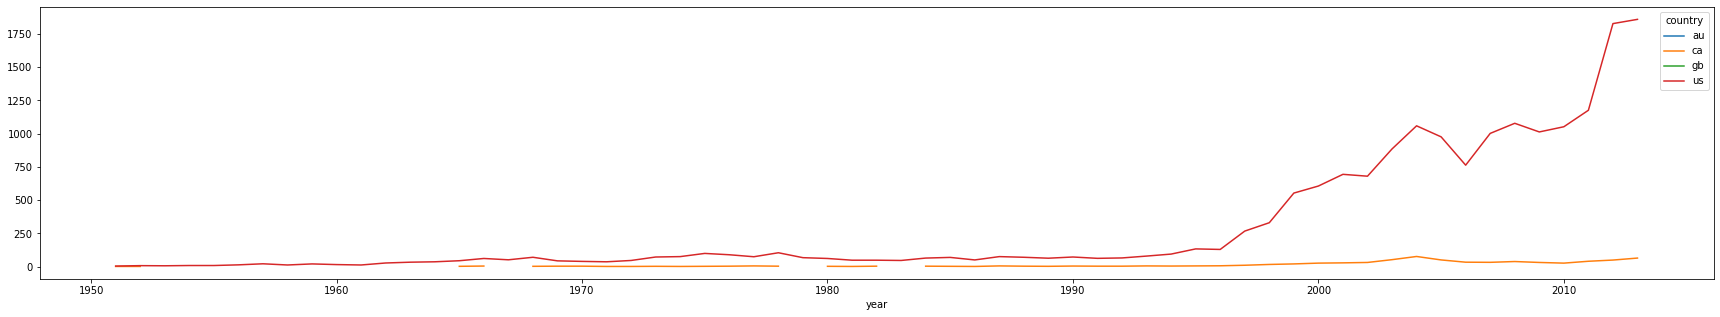

In [57]:
df_groupby_bycountry.unstack().plot(figsize=(30,5))

In [58]:
df["shape"].groupby(df["shape"]).count()

shape
changed         1
changing      697
chevron       177
cigar         431
circle       1866
cone           83
cross          59
cylinder      280
delta           2
diamond       318
disk         1370
egg           163
fireball     1089
flash         235
formation     645
light        4342
other        1351
oval          913
rectangle     273
round           1
sphere       1272
teardrop      155
triangle     1763
unknown      1477
Name: shape, dtype: int64

In [59]:
df["shape"][df["shape"].isin(["crescent","round","delta","changed"]) == False].groupby(df["shape"]).count()

shape
changing      697
chevron       177
cigar         431
circle       1866
cone           83
cross          59
cylinder      280
diamond       318
disk         1370
egg           163
fireball     1089
flash         235
formation     645
light        4342
other        1351
oval          913
rectangle     273
sphere       1272
teardrop      155
triangle     1763
unknown      1477
Name: shape, dtype: int64

In [60]:
df = df[df["shape"].isin(["crescent","round","delta","changed"]) == False]

In [61]:
df_subset_byshape= df[["year","shape"]]
df_groupby_byshape = df_subset_byshape.groupby(["year","shape"]).size()
#df_subset_byshape.groupby(["year","shape"]).size()

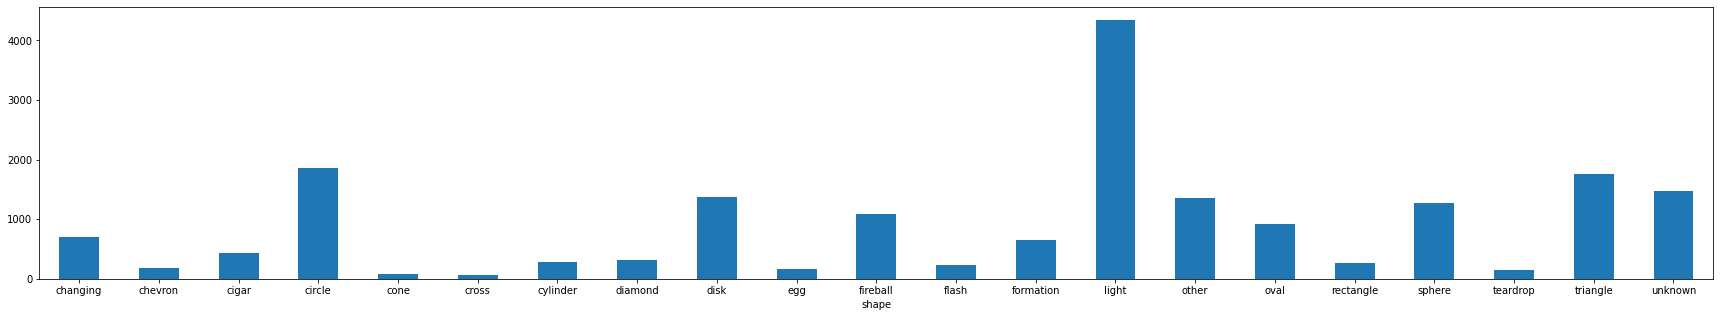

In [62]:
df["shape"].groupby(df["shape"]).count().plot.bar(x='lab', y='val', rot=0,figsize=(30,5))

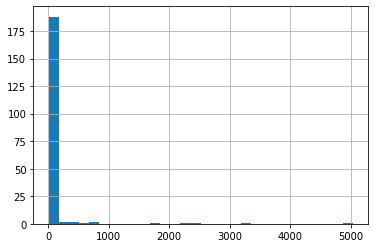

In [67]:
df["duration (seconds)"].groupby(df["duration (seconds)"]).count().hist(bins=30)

In [64]:
df["duration (seconds)"].groupby(df["duration (seconds)"]).count()

duration (seconds)
300.13        1
309.00        1
310.00        2
315.00        3
322.00        1
330.00        6
335.00        1
345.00        1
345.50        1
350.00        2
355.00        1
360.00      517
380.00        1
382.00        1
384.00        1
390.00        1
393.00        1
399.00        1
400.00        1
420.00      718
424.00        1
425.00        1
435.00        1
438.00        1
450.00        5
479.00        1
480.00      480
492.00        2
496.00        1
510.00        1
540.00       68
550.00        1
555.00        1
570.00        1
585.00        1
597.00        1
599.00        1
600.00     5039
603.00        1
605.00        2
606.00        1
610.00        1
615.00        1
620.00        1
625.00        2
630.00        3
633.00        1
639.00        1
640.00        2
658.00        1
660.00       33
688.00        1
695.00        1
698.00        1
705.00        2
720.00      196
721.00        1
725.00        1
727.00        1
750.00        1
751.00        2
771.0

,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,timestamp,date,year,month,duration (minutes)
44062,ottawa (canada),on,ca,other,82800000.0,23000hrs,((HOAX??)) I was out in a field near mil&#44 ...,7/6/2010,45.416667,-75.7,6/3/2010 23:30,2010-06-03,2010,6,1380000.0
